In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import random

In [4]:
df_weather = pd.read_csv('weatherHistory.csv')

In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [6]:
df_weather.head(25)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259,9.9820,0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279,9.9820,0,1017.22,Partly cloudy throughout the day.


In [7]:
df_weather = df_weather.drop(columns=['Formatted Date'])

printing unique values of categorial features

In [8]:
df_weather['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [9]:
df_weather['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [10]:
df_weather['Daily Summary'].nunique()

214

so much in Daily Summary, lets get the number of unique values

What I may suggest to do

We should't do OHE for the last column definitely. This is a daily summary, so it is anyways just a mean of the values in column Summary per each day. We have two options: build clusterization by Summary values (value per hour), or build clusterization by Daily Summary (but bec. of 214 values, we better categorize them to reduce the number of unique ones)

for ex, transform all these "partially cloudly in evening", "ppartially cloudly in afternoon" and etc. by just "partially cloudly"

Here I create separated dataframe for clusterization per hour

In [11]:
df_weatherHour = df_weather.drop(columns=['Daily Summary'])

In [12]:
df_weather_hour_encoded = pd.get_dummies(df_weatherHour, columns=df_weatherHour.select_dtypes(include=['object']).columns,
                                       drop_first=True)

In [13]:
df_weather_hour_encoded.head(10)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,False,False,...,False,True,False,False,False,False,False,False,False,False
1,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,False,False,...,False,True,False,False,False,False,False,False,False,False
2,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,False,False,...,False,True,False,False,False,False,False,False,False,False
4,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,False,False,...,False,False,False,False,False,False,False,False,False,False
5,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,False,False,...,False,True,False,False,False,False,False,False,False,False
6,7.733333,5.522222,0.95,12.3648,259,9.9820,0,1016.72,False,False,...,False,True,False,False,False,False,False,False,False,False
7,8.772222,6.527778,0.89,14.1519,260,9.9820,0,1016.84,False,False,...,False,True,False,False,False,False,False,False,False,False
8,10.822222,10.822222,0.82,11.3183,259,9.9820,0,1017.37,False,False,...,False,True,False,False,False,False,False,False,False,False
9,13.772222,13.772222,0.72,12.5258,279,9.9820,0,1017.22,False,False,...,False,True,False,False,False,False,False,False,False,False


In [14]:
df_weather_hour_encoded.shape[1]  #number of columns


35

## Simple Visualization

<Axes: xlabel='Humidity', ylabel='Visibility (km)'>

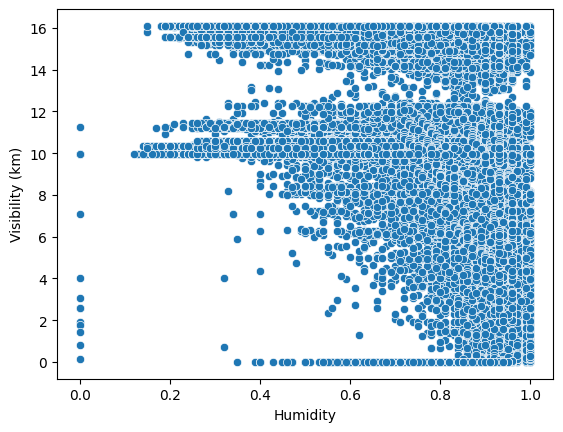

In [15]:
import seaborn as sns

sns.scatterplot(df_weather, x="Humidity", y="Visibility (km)")

Lets apply the model on the dataframe

In [16]:
optics_model = OPTICS()

In [17]:
# optics_model.fit(df_weather_hour_encoded)

In [18]:
# cluster_labels = optics_model.labels_
# df_weather_hour_encoded['Cluster'] = cluster_labels

In [19]:
#scatter = plt.scatter(df_weather_hour_encoded["Humidity"], df_weather_hour_encoded["Visibility (km)"],
#                      c=df_weather_hour_encoded['Cluster'], cmap='viridis', alpha=0.6)
#plt.title('OPTICS Clustering Visualization')
#plt.xlabel(feature1)
#plt.ylabel(feature2)
#plt.colorbar(scatter, label='Cluster Label')
#plt.grid()
#plt.show()

## DBSCAN

In [20]:
from sklearn.neighbors import NearestNeighbors

In [21]:
# data_points = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]

# database = NearestNeighbors(radius=1.0).fit(data_points)

# points = [[0,1,0]]
# eps = 1.5

# dist, indeces = database.radius_neighbors(points, radius=eps)
# indeces

In [22]:
from dataclasses import dataclass

@dataclass(slots=True)
class Point:
    value: list[list[float]]
    index: int
    cluster_id: int

In [23]:
NOISE_ID = -999
UNVISITED_ID = -1

class DataBase:
    def __init__(self):
        self.index_store = NearestNeighbors()
        self.points: list[Point] = []

    def fit(self, data_points: list[list[float]]):
        self.index_store = self.index_store.fit(data_points)
        self.points = [Point(value, i, UNVISITED_ID) for i, value in
                                    enumerate(data_points)]

    def radius_neighbors(self, point: list[list[int]], radius: float) -> list[Point]:
        # print(point)
        distances, indeces = self.index_store.radius_neighbors([point], radius)
        # print(indeces)
        near_points = [self.points[i] for i in indeces[0]]
        return near_points

    def _count_occurrences(self, clusters: list[int]) -> dict[int, int]:
        occurrence_dict = {}
        for num in clusters:
            if num in occurrence_dict:
                occurrence_dict[num] += 1
            else:
                occurrence_dict[num] = 1
        return dict(sorted(occurrence_dict.items(), key=lambda item: item[1], reverse=True))


    def __getitem__(self, index: int):
        return self.points[index]

    @property
    def size(self) -> int:
        return len(self.points)

    def stats(self) -> None:
        clusters = [point.cluster_id for point in self.points]
        occurences = self._count_occurrences(clusters)
        for key, value in occurences.items():
            print(f"Cluster {key} has {value} points in it")

    def plot_clusters(self, xlabel: str, ylabel: str, col1: int, col2: int) -> None:
        points = np.array([point.value for point in self.points])
        clusters = [point.cluster_id for point in self.points]
        unique_clusters = np.unique(clusters)

        colors = {cluster: (random.random(), random.random(), random.random()) for cluster in unique_clusters}

        # Convert points to x and y coordinates
        x_coords = np.array(points)[:, col1]
        y_coords = np.array(points)[:, col2]

        # Create a scatter plot with small and half-visible points, assigning random colors based on clusters
        for cluster_id in unique_clusters:
            mask = np.array(clusters) == cluster_id
            cluster_points = points[np.array(clusters) == cluster_id]


            plt.scatter(cluster_points[:, col1], cluster_points[:, col2],
                        color=colors[cluster_id], label=f'Cluster {cluster_id}',
                        s=50, alpha=0.99, edgecolor='k')

        # Create a discrete legend
        plt.legend(title='Clusters')

        # Add labels and title
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title('Scatter Plot of Points with Random Colors per Cluster')

        # Show the plot
        plt.show()

In [24]:
# first value in db's points is index of a point

def _expand_cluster(db, point, point_index: int, cluster_id: int, eps_radius: float, min_pts_density: int) -> bool:
    # Returns False if point is noise and True if it is a member of cluster
    seeds = db.radius_neighbors(point.value, radius=eps_radius)
    if len(seeds) < min_pts_density:
        point.cluster_id = NOISE_ID
        return False
    else:
        # all points in seeds are density-reachable from *point*
        for seed in seeds:
            seed.cluster_id = cluster_id

        for current_point in seeds:
            result = db.radius_neighbors(current_point.value, eps_radius)

            if len(result) >= min_pts_density:
                # resultP
                for neighbor_point in result:
                    if neighbor_point.cluster_id in (NOISE_ID, UNVISITED_ID):
                        if neighbor_point.cluster_id == UNVISITED_ID:
                            seeds.append(neighbor_point)
                        neighbor_point.cluster_id = cluster_id
        return True


def dbscan(db, eps_radius: float, min_pts_density: int):
    cluster_id = 0
    for i in range(db.size):
        point = db[i]
        if point.cluster_id == UNVISITED_ID:
            if _expand_cluster(db, point, i, cluster_id ,eps_radius, min_pts_density):
                cluster_id += 1

    return db

### Usage

In [25]:
db = DataBase()

db.fit([[1, 2], [0, 0], [3, 3], [5, 8], [9,9]])

db = dbscan(db, eps_radius=5, min_pts_density=1)

In [26]:
db.points

[Point(value=[1, 2], index=0, cluster_id=0),
 Point(value=[0, 0], index=1, cluster_id=0),
 Point(value=[3, 3], index=2, cluster_id=0),
 Point(value=[5, 8], index=3, cluster_id=1),
 Point(value=[9, 9], index=4, cluster_id=1)]

In [27]:
db.stats()

Cluster 0 has 3 points in it
Cluster 1 has 2 points in it


In [28]:
test_df = df_weather[["Humidity", "Visibility (km)"]].dropna()
data = test_df.to_numpy()
data, data.shape

(array([[ 0.89  , 15.8263],
        [ 0.86  , 15.8263],
        [ 0.89  , 14.9569],
        ...,
        [ 0.56  , 16.1   ],
        [ 0.6   , 16.1   ],
        [ 0.61  , 15.5204]]),
 (96453, 2))

In [29]:
import time

def experiment_dbscan(data: np.ndarray, col1: int, col2: int, eps_radius: float = 0.1, min_pts_density: int = 10) -> DataBase:
    np.random.seed(69)


    db = DataBase()
    db.fit(data)

    t1 = time.perf_counter()
    db = dbscan(db, eps_radius=eps_radius, min_pts_density=min_pts_density)
    t2 = time.perf_counter()
    print("elapsed time:", t2 - t1)

    db.stats()
    db.plot_clusters("Humidity", "Visibilty", col1, col2)

    return db

elapsed time: 144.45099286100003
Cluster 1 has 69736 points in it
Cluster 0 has 26597 points in it
Cluster -999 has 109 points in it
Cluster 2 has 11 points in it


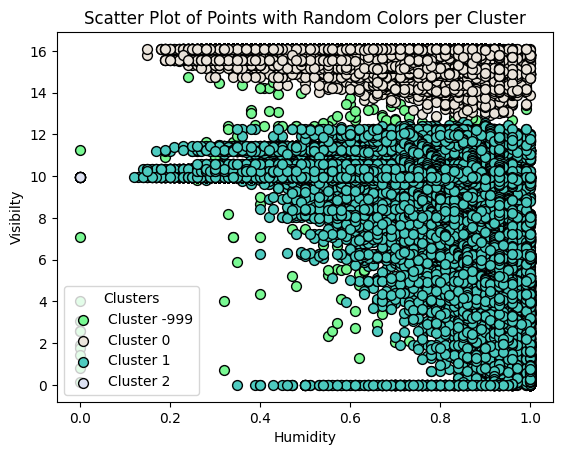

In [30]:
#  db = experiment_dbscan(data, 0, 1)

### Try Bigger Dataset

In [31]:
test_df = df_weather[["Temperature (C)", "Apparent Temperature (C)", "Humidity",
                      "Wind Speed (km/h)",	"Wind Bearing (degrees)",	"Visibility (km)",
                      "Loud Cover", "Pressure (millibars)"]].dropna()
print(test_df.columns)
data = test_df.to_numpy()
data, data.shape

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


(array([[9.47222222e+00, 7.38888889e+00, 8.90000000e-01, ...,
         1.58263000e+01, 0.00000000e+00, 1.01513000e+03],
        [9.35555556e+00, 7.22777778e+00, 8.60000000e-01, ...,
         1.58263000e+01, 0.00000000e+00, 1.01563000e+03],
        [9.37777778e+00, 9.37777778e+00, 8.90000000e-01, ...,
         1.49569000e+01, 0.00000000e+00, 1.01594000e+03],
        ...,
        [2.20388889e+01, 2.20388889e+01, 5.60000000e-01, ...,
         1.61000000e+01, 0.00000000e+00, 1.01566000e+03],
        [2.15222222e+01, 2.15222222e+01, 6.00000000e-01, ...,
         1.61000000e+01, 0.00000000e+00, 1.01595000e+03],
        [2.04388889e+01, 2.04388889e+01, 6.10000000e-01, ...,
         1.55204000e+01, 0.00000000e+00, 1.01616000e+03]]),
 (96453, 8))

In [32]:
# db = experiment_dbscan(data, 2, 5, eps_radius=3, min_pts_density=30)

In [33]:
# db = experiment_dbscan(data, 2, 5, eps_radius=3, min_pts_density=30)

### Test DBSCAN on moons dataset

elapsed time: 0.04775245399991945
Cluster 0 has 50 points in it
Cluster 1 has 50 points in it


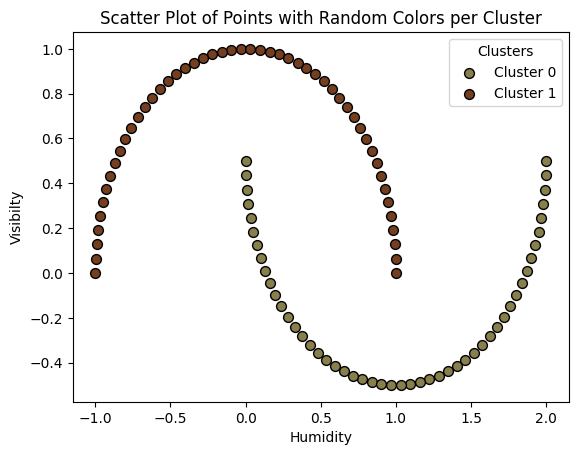

In [34]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons()

db = experiment_dbscan(X_moons, 0, 1, eps_radius=0.2, min_pts_density=2)

## OPTICS Implementation

In [60]:
from dataclasses import field
import heapq
from math import dist

class OptPoint(Point):
    pass

class PriorityQueue:
    def __init__(self):
        self.heap = []
        self.entry_finder = {}  # Mapping of points to their entries in the heap
        self.REMOVED = '<removed-point>'
        self.counter = 0

    def add_point(self, point: OptPoint, priority=0.0):
        """Add a new point or update the priority of an existing point"""
        if point.index in self.entry_finder:
            self.remove_point(point)
        entry = [priority, self.counter, point]
        self.entry_finder[point.index] = entry
        heapq.heappush(self.heap, entry)

        self.counter += 1

    def remove_point(self, point: OptPoint):
        """Mark an existing point as REMOVED"""
        entry = self.entry_finder.pop(point.index)
        entry[-1] = self.REMOVED

    def move_up(self, point: OptPoint, new_priority):
        """Update the priority of a point and move it up"""
        self.add_point(point, new_priority)  # Re-insert with updated priority

    def pop_point(self):
        """Remove and return the lowest priority point"""
        while self.heap:
            priority, count, point = heapq.heappop(self.heap)
            if point is not self.REMOVED:
                del self.entry_finder[point.index]
                return point
        raise KeyError('pop from an empty priority queue')

In [152]:
@dataclass(slots=True)
class OptPoint(Point):
    reachability_distance: float = field(default=None)  # default to infinity (undefined)
    processed: bool = field(default=False)


class OpticsDataBase(DataBase):
    def __init__(self):
        super().__init__()

    def fit(self, data_points: list[list[float]]):
        self.index_store = self.index_store.fit(data_points)
        self.points = [OptPoint(value, i, UNVISITED_ID) for i, value in
                                    enumerate(data_points)]
        self.ordering = None

    def min_pts_distance(self, point: list[float], k: int):
        index_store: NearestNeighbors = self.index_store
        dist, neighbors = index_store.kneighbors([point], k, return_distance=True)
        largest_dist = dist.max()
        return largest_dist

    def get_reachability_distances(self) -> tuple[list[list[float]], list[float]]:
        # returns ordered points
        points = [point.value for point in self.ordering]
        reach_dist = [point.reachability_distance for point in self.ordering]

        return points, reach_dist

    def plot_reachability(self):
        _, reachability = self.get_reachability_distances()

        undefined_value = round(4 * max([r for r in reachability if r is not None]))

        # Replace None values with the undefined_value (for UNDEFINED)
        reachability = [undefined_value if r is None else r for r in reachability]

        # Create the cluster order based on the number of reachability values
        cluster_order = np.arange(len(reachability))

        # Create the plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=cluster_order, y=reachability, color='black')

        # Labels and title
        plt.xlabel("Cluster-order of the objects")
        plt.ylabel("Reachability-distance")
        plt.title("Reachability Plot")

        # Mark y=undefined_value as UNDEFINED
        plt.axhline(y=undefined_value, color='gray', linestyle='--')
        plt.text(len(cluster_order) - 1, undefined_value, 'UNDEFINED', va='bottom', ha='right', color='gray')

        # Remove x-tick labels (but keep the axis for structure)
        plt.xticks([])

        # Add legend with eps and min_pts
        plt.legend([f"eps = {self.eps}, min_pts = {self.min_pts}"], loc='upper right')

        # Display the plot
        plt.show()


In [176]:
from tqdm.notebook import trange, tqdm

def calc_core_distance(db: OpticsDataBase, point: list[float], eps_radius: float, min_pts: int) -> float:
    epsilon_cardinality = len(db.radius_neighbors(point, eps_radius))

    if epsilon_cardinality < min_pts:
        return None # UNDEFINED
    else:
        return db.min_pts_distance(point, min_pts) #min_pts-distance

def update_seeds(db: OpticsDataBase, neighbors: np.ndarray, point: OptPoint, seeds: list, eps_radius: float, min_pts: int):
    core_dist = calc_core_distance(db, point.value, eps_radius, min_pts)

    for neighbor in neighbors:
        if neighbor.processed is False:
            new_reach_dist = max(core_dist, dist(point.value, neighbor.value))
            # print(new_reach_dist)

            if neighbor.reachability_distance == None: # o s not in seeds
                neighbor.reachability_distance = new_reach_dist
                seeds.add_point(neighbor, new_reach_dist)
            else:
                if new_reach_dist < neighbor.reachability_distance:
                    neighbor.reachability_distance = new_reach_dist
                    seeds.move_up(neighbor, new_reach_dist)


def expand_cluster_order(db: OpticsDataBase, point: OptPoint, eps_radius: float, min_pts_density: int):
    neighbors = db.radius_neighbors(point.value, radius=eps_radius)

    point.processed = True
    point.reachability_distance = None # UNDEFINED
    point_core_distance = calc_core_distance(db, point.value, eps_radius, min_pts_density)
    db.ordering.append(point)

    if point_core_distance != None:
        seeds = PriorityQueue()
        update_seeds(db, neighbors, point, seeds, eps_radius, min_pts_density)

        for entry in seeds.heap:
            _, _, other_point = entry
            if other_point == seeds.REMOVED:
                continue

            other_neighbors = db.radius_neighbors(other_point.value, radius=eps_radius)
            other_point.processed = True

            db.ordering.append(other_point)

            if calc_core_distance(db, other_point.value, eps_radius, min_pts_density) != None:
                update_seeds(db, other_neighbors, other_point, seeds, eps_radius, min_pts_density)


def optics(db: OpticsDataBase, eps_radius: float, min_pts_density: int):
    db.ordering: list[int] = list()

    db.eps = eps_radius
    db.min_pts = min_pts_density

    for i in tqdm(range(db.size), desc="Processing Data Points"):
        point = db[i]
        if not point.processed:
            expand_cluster_order(db, point, eps_radius, min_pts_density)

    return db


### Test OPTICS

In [163]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[0.40, 0.2, 0.05], random_state=0)

<Axes: >

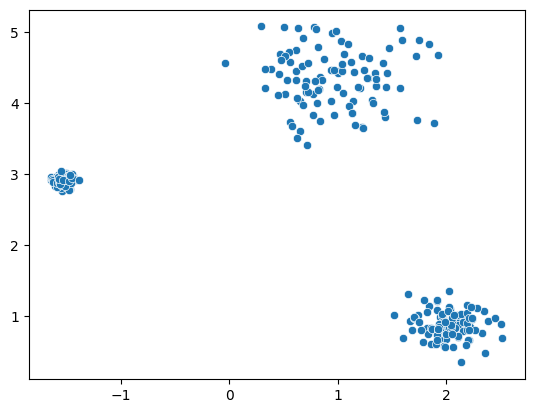

In [164]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])

Processing Data Points:   0%|          | 0/300 [00:00<?, ?it/s]

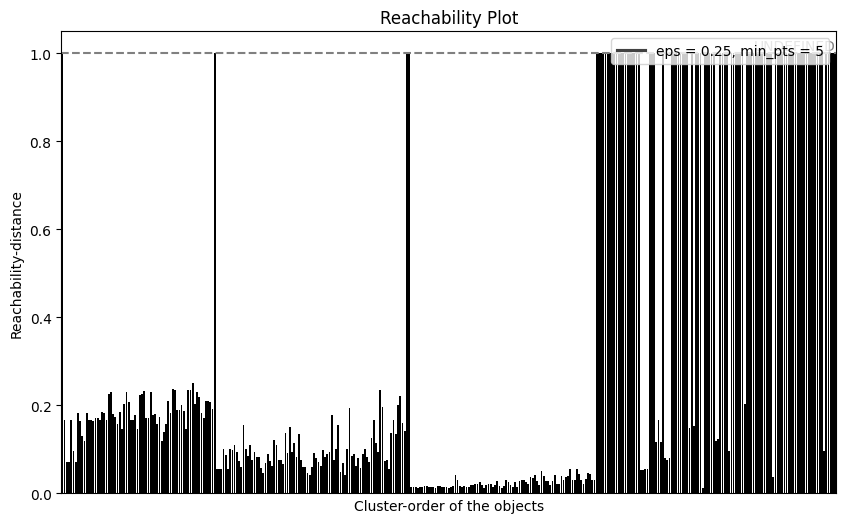

In [172]:
db = OpticsDataBase()
db.fit(X)
db = optics(db, eps_radius=0.25, min_pts_density=5)
db.plot_reachability()

In [181]:
test_df = df_weather[["Temperature (C)", "Apparent Temperature (C)", "Humidity",
                      "Wind Speed (km/h)",	"Wind Bearing (degrees)",	"Visibility (km)",
                      "Loud Cover", "Pressure (millibars)"]].dropna().head(10000)
print(test_df.columns)
data = test_df.to_numpy()
data, data.shape

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


(array([[9.47222222e+00, 7.38888889e+00, 8.90000000e-01, ...,
         1.58263000e+01, 0.00000000e+00, 1.01513000e+03],
        [9.35555556e+00, 7.22777778e+00, 8.60000000e-01, ...,
         1.58263000e+01, 0.00000000e+00, 1.01563000e+03],
        [9.37777778e+00, 9.37777778e+00, 8.90000000e-01, ...,
         1.49569000e+01, 0.00000000e+00, 1.01594000e+03],
        ...,
        [2.35444444e+01, 2.35444444e+01, 6.00000000e-01, ...,
         1.43612000e+01, 0.00000000e+00, 1.01488000e+03],
        [2.41833333e+01, 2.41833333e+01, 5.80000000e-01, ...,
         1.49730000e+01, 0.00000000e+00, 1.01465000e+03],
        [2.47277778e+01, 2.47277778e+01, 5.50000000e-01, ...,
         1.54721000e+01, 0.00000000e+00, 1.01446000e+03]]),
 (10000, 8))

Processing Data Points:   0%|          | 0/10000 [00:00<?, ?it/s]

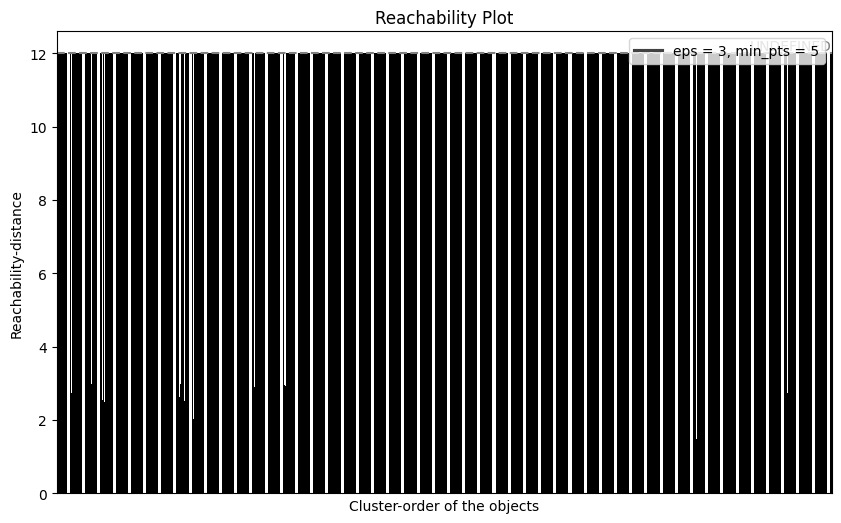

In [182]:
db = OpticsDataBase()
db.fit(data)
db = optics(db, eps_radius=3, min_pts_density=5)
# db.plot_reachability()